# **Introducción al Machine Learning**
# ML_AE-15 - Introducción a la Regresión Lineal

El contenido de esta clase corresponde a la implementación utilizando Python + Numpy para generar regresión lineal simple, y regresión lineal múltiple. La idea es poder entender y traspasar el proceso de una notación matemática, a operaciones de código utilizando numpy. Finalmente, enseñar el uso de librerías y comprobar que nuestras implementaciones *from scratch*, obtienen resultados similares a las implementaciones estándar de las librerías.

## Qué es la Regresión Lineal
La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente y una o más variables independientes. Su objetivo principal es encontrar una función lineal que describa, de la manera más precisa posible, cómo varía la variable dependiente en función de las independientes.



In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## <font color='blue'>**Regresión lineal simple**</font>

Para ilustrar el cómo podemos ajustar una regresión lineal simple, vamos a simular datos aleatorios. Vamos a generar una variable independiente `x`, con valores del 1 al 10, y nuestra variable dependiente `y` corresponderá a una combinación de números enteros obtenidos de forma aleatoria entre $[10,20]$, con nuestra variable $x$.

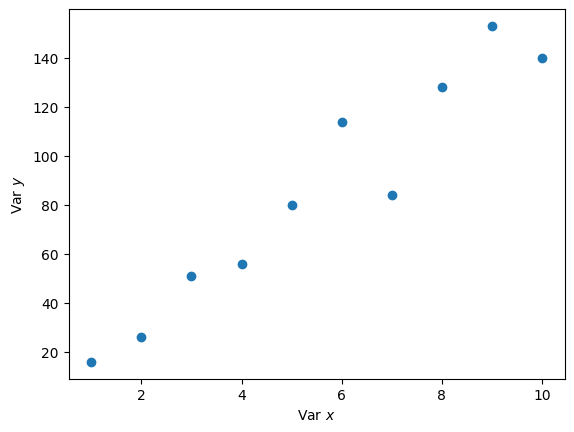

In [2]:
np.random.seed(42) #Fijamos la semilla aleatoria

x = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20,
# luego lo multiplicamos con nuestra variable x
y = np.random.randint(10, 20, size=10) * x


plt.scatter(x,y) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

La regresión lineal busca modelar la dependencia entre una variable dependiente y una o más variables independientes. En este caso, hemos generado explícitamente una dependencia de $y$ en función de $x$, pero en conjuntos de datos reales esta relación puede ser mucho más compleja de modelar. La forma general de una regresión lineal simple se expresa mediante la siguiente ecuación:
<br><br>
$$Y = \beta_1 X + \beta_0 + \epsilon$$

donde:
- $Y$ representa la variable dependiente,
- $X$ la variable independiente,
- $\beta_1$ el coeficiente de regresión, que modela la relación entre $X$ y $Y$,
- $\beta_0$ el intercepto o término independiente, y
- $\epsilon$ un término de error que agrupa múltiples factores de pequeña magnitud que afectan la respuesta.
<br><br>

Nuestro objetivo es aproximar los valores de $Y$ y de los parámetros del modelo ($\beta_1$ y $\beta_0$). Para indicar estas estimaciones, utilizaremos la notación $\hat{Y}$, $\hat{\beta_1}$ y $\hat{\beta_0}$. Para estimar los parámetros emplearemos el método de los mínimos cuadrados, el cual se basa en minimizar la suma de los errores cuadráticos.

Los pasos para calcular las estimaciones son los siguientes:
- Primer paso: calcular $\hat{\beta_1}$
<br><br>
$$
\hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2} =\frac{\sum(x - \bar{x})(y - \bar{y})}{\sum(x - \bar{x})^2}
$$
<br><br>
- Segundo paso: calcular $\hat{\beta_0}$ en función de $\hat{\beta_1}$
<br><br>
$$
\hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n} = \bar{y} - \hat{\beta_1}\bar{x}
$$
<br><br>

En nuestra implementación, utilizaremos funciones de NumPy como `np.sum` para calcular las sumatorias ($\Sigma$) y `np.mean` para calcular los promedios ($\bar{x}$ y $\bar{y}$). El número de observaciones $n$ será representado mediante len(x). Cabe destacar que operaciones como $x - \bar{x}$ pueden realizarse directamente, ya que x es un vector de NumPy y admite operaciones entre vectores y escalares de forma eficiente.

In [3]:
x_min_mx = x - np.mean(x)  # x minus mean(x)
y_min_my = y - np.mean(y)  # y minus mean(y)

beta_1 = np.sum(x_min_mx * y_min_my)  / np.sum(x_min_mx**2)
beta_0 = np.mean(y) - (beta_1 * np.mean(x))

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1: 15.20 
beta_0:  1.20


## <font color='green'>**Actividad 1**</font>

Implementar la primera forma de cada uno de los parámetros:

$$ \hat{\beta_1} = \frac{(\sum x \sum y) - (n\sum xy)}{(\sum x)^2 - n\sum x^2}$$
y
$$ \hat{\beta_0} = \frac{\sum y - \hat{\beta_1}\sum x}{n}$$

- Compruebe que los valores de obtenidos con la primera forma y la segunda forma son iguales
- ¿Qué pasaría con nuestros coeficientes si cambiamos la forma de generar nuestra variable dependiente $Y$? Fije una semilla y reemplace el operador utilizado (en vez de multiplicar por $x$, cambiar por ej: suma)


In [4]:
# Tu código aquí ...
# Compruebe que los valores de obtenidos con la primera forma y la segunda
# forma son iguales
#

beta_1 = (np.sum(x)*np.sum(y) - len(x)*np.sum(x*y)) / (np.sum(x)**2 - len(x)*np.sum(x**2))
beta_0 = (np.sum(y) - beta_1*np.sum(x)) / len(x)

print(f'beta_1: {beta_1:5.2f} \nbeta_0: {beta_0:5.2f}')

beta_1: 15.20 
beta_0:  1.20


Ahora fijamos una semilla y cambiamos el operador multiplocador por divisor.

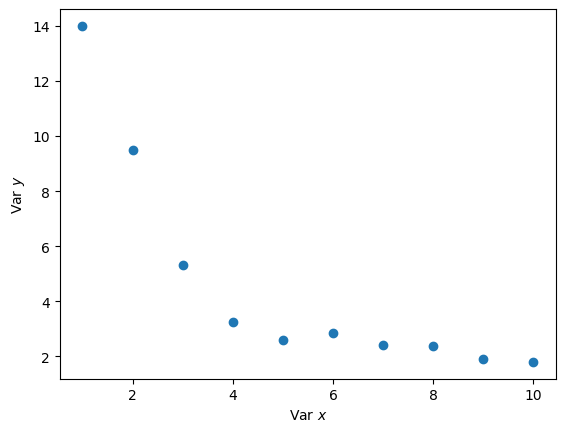

In [5]:
np.random.seed(7) #Fijamos la semilla aleatoria

x_1 = np.arange(1,11) # Generamos 10 numeros desde el 1 al 10
# Generamos 10 numeros aleatorios entre 10 y 20,
# luego lo multiplicamos con nuestra variable x
y_1 = np.random.randint(10, 20, size=10) / x_1


plt.scatter(x_1,y_1) # Grafiquemos como se ven nuestros datos.
plt.xlabel("Var $x$")
plt.ylabel("Var $y$")
plt.show()

In [6]:
beta_1_1 = (np.sum(x_1)*np.sum(y_1) - len(x_1)*np.sum(x_1*y_1)) / (np.sum(x_1)**2 - len(x_1)*np.sum(x_1**2))
beta_0_1 = (np.sum(y_1) - beta_1_1*np.sum(x_1)) / len(x_1)

print(f'beta_1: {beta_1_1:5.2f} \nbeta_0: {beta_0_1:5.2f}')

beta_1: -1.09 
beta_0: 10.60


<font color='green'>Fin Actividad 1</font>

Con los parámetros $\hat{\beta_1}$ y $\hat{\beta_0}$, podemos generar una función la cual reciba el valor el vector $x$, y realizar la estimación de $\hat{Y}$:

In [7]:
# Llamaremos a esta función, lin_reg(x), recibe el vector y utiliza las variables betas calculadas anteriormente
# Una posible mejora, es que reciba los betas por parámetros de la función
def lin_reg(x):
    y_hat = (beta_1 * x) + beta_0 #Aplicamos la forma de la regresión lineal
    return y_hat

Con esta función definida, podemos graficar nuestra recta obtenida utilizando la función `lin_reg`

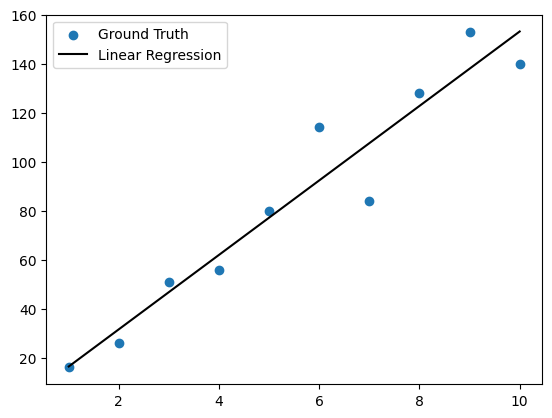

In [8]:
plt.scatter(x,y,label="Ground Truth") # Vamos a gráficar nuestros datos originales
plt.plot(x,lin_reg(x), color="black", label="Linear Regression") #Luego graficamos la curva ajustada

plt.legend()
plt.show()

Podemos ver que nuestra regresión es bastante cercana a los valores reales utilizados para ajustar la regresión. Nosotros podemos calcular la bondad de ajuste de nuestra regresión, mediante el análisis de los errores. El error se define como: $y_i - \hat{y_i}$ y corresponde a la resta del valor real $i$-ésimo, con el valor ajustado $i$-ésimo.

Utilizando Numpy, este cálculo es relativamente sencillo, para mostrar el paso a paso, vamos a tener los valores del vector $y$:


In [9]:
print(y)

[ 16  26  51  56  80 114  84 128 153 140]


Por otra parte, vamos a tener los valores del vector $\hat{y}$:

In [10]:
print(lin_reg(x))

[ 16.4  31.6  46.8  62.   77.2  92.4 107.6 122.8 138.  153.2]


Luego, los errores $e$, se obtienen simplemente con la resta entre estos dos elementos

In [11]:
e = y - lin_reg(x)
print(e)

[ -0.4  -5.6   4.2  -6.    2.8  21.6 -23.6   5.2  15.  -13.2]


Estos errores, podemos graficarlos utilizando el método de matplotlib `vlines` (Vertical Lines). Este método recibe como mínimo 3 parámetros: `x` (los valores en el eje X), `y_min` el inicio de la línea vertical, `y_max` el final de la línea vertical. En este caso, `y_min` va a corresponder a los valores reales $y$, e `y_max` corresponderán a los valores ajustados $\hat{y}$.

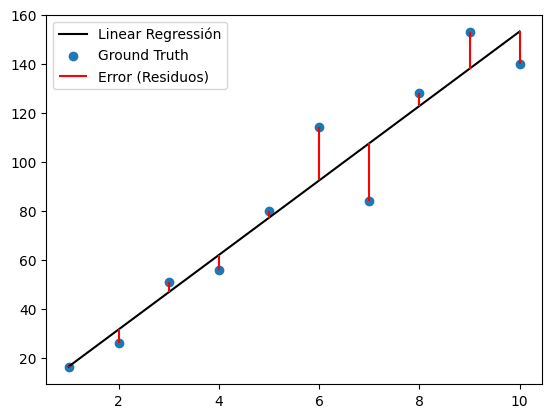

In [12]:
fig, ax = plt.subplots(1,1)
ax.plot(x,lin_reg(x), color="black", label="Linear Regressión")
ax.scatter(x,y, label="Ground Truth")

ax.vlines(x, y, lin_reg(x), color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto.

plt.legend()
plt.show()

Como mencionamos anteriormente, la regresión lineal se ajusta de manera bastante adecuada a los datos simulados. Ahora, procederemos a cuantificar numéricamente qué tan bien se ajusta el modelo. Para ello, calcularemos el coeficiente de determinación, $R^2$, a partir de la __Suma Total de los Cuadrados__ ($SST$) y la __Suma de los Errores al Cuadrado__ ($SSE$).

El $SST$ (por su sigla en inglés __Sum of Squares Total__) mide la variabilidad total presente en el conjunto de datos, específicamente en la variable dependiente. Se calcula mediante la siguiente expresión:
<br><br>
$$
SST = \sum_i (y_i - \bar{y})^2
$$
<br><br>
Por otro lado, el $SSE$ (sigla en inglés de Sum of Squares Error) cuantifica la suma de las diferencias al cuadrado entre los valores reales (observados) y los valores predichos por el modelo. Se define como:
<br><br>
$$
SSE = \sum_i (y_i - \hat{y}_i)^2 = \sum_i e_i^2
$$
<br><br>
Con estas dos métricas, podemos calcular el __Coeficiente de Determinación__ $R^2$, que proporciona una medida de la proporción de la variabilidad total de la variable dependiente que es explicada por el modelo de regresión:
<br><br>
$$
R^2 = 1 - \frac{SSE}{SST}
$$
<br><br>

El valor de $R^2$ oscila entre $0$ y $1$. Un valor de $R^2 = 1$ indica que el modelo explica el 100% de la variabilidad de la variable dependiente, mientras que un valor de $R^2 = 0$ sugiere que el modelo no explica ninguna de las variaciones observadas.

Procedamos ahora a calcular el $R^2$ correspondiente a nuestros datos sintéticos.

In [13]:
SST = np.sum((y - np.mean(y))**2) #Calculamos la suma total de los cuadrados
SSE = np.sum((y - lin_reg(x))**2) # Calculamos la suma de los errores cuadrados
R2 = 1 - (SSE / SST) # Computamos el R^2

print(f"El R^2 obtenido para nuestros datos sintéticos es de {R2:6.4f}")

El R^2 obtenido para nuestros datos sintéticos es de 0.9251


Con esto, podemos decir que nuestra regresión lineal simple, es capaz de explicar un $92.51\%$ de la variabilidad del comportamiento de nuestra variable dependiente sintética. Esto hace bastante sentido, ya que ese $7.49\%$ que no es capaz de explicar, principalmente se debe a la aleatoriedad que nosotros introdujimos en la variable dependiente (`np.random.randint(10, 20, size=10)`).

### __Otras métricas__

Otra forma de evaluar la calidad de un modelo de regresión es a través del análisis de los errores. En una regresión perfecta, el __Suma de los Errores al Cuadrado__ ($SSE$) sería igual a cero, lo que indicaría que los valores predichos coinciden exactamente con los valores observados.

Existen varias métricas basadas en el análisis de errores, entre las cuales destacan el __Error Cuadrático Medio__ (__Mean Squared Error__, $MSE$), el __Error Absoluto Medio__ (__Mean Absolute Error__, $MAE$) y el __Error Absoluto Porcentual Medio__ (__Mean Absolute Percentage Error__, $MAPE$). En el contexto de pronósticos, el objetivo es minimizar estos errores: mientras menores sean, mayor será la precisión de las predicciones.

Cada una de estas métricas proporciona una interpretación específica:
- El $MAE$ entrega una medida promedio de la magnitud de los errores (residuos), ofreciendo una visión general del desempeño del modelo.
- El $MAPE$ expresa el error de manera porcentual, indicando qué tanto, en promedio, se desvían las predicciones respecto a los valores reales.
- El $MSE$, al involucrar el cuadrado de los errores, penaliza más fuertemente los errores grandes, haciendo que esta métrica sea especialmente sensible a valores atípicos. Esto puede visualizarse en el gráfico de residuos mostrado previamente.

Las expresiones matemáticas de estas métricas son las siguientes:
<br><br>
$$
MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$
<br><br>
$$
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
$$
<br><br>
$$
MAPE = \frac{1}{n} \sum_{i=1}^n \left| \frac{y_i - \hat{y}_i}{y_i} \right|
$$
<br><br>
Nota: El $MAPE$ no está definido cuando $y_i = 0$, lo que limita su uso en datasets donde puedan aparecer valores nulos en la variable dependiente.

A continuación, utilizando numpy, procederemos a calcular estas métricas de error para nuestro modelo.

In [14]:
mse = np.sum((y - lin_reg(x))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg(x))) / len(y)
mape = np.sum(np.abs((y - lin_reg(x)) / y)) / len(y)

Luego, simplemente las imprimimos y vemos que si bien, el $MAE$ y el $MAPE$ son bajos, los puntos ${6, 7, 9, 10}$ de los datos, influyen considerablemente en el $MSE$

In [15]:
print(f'MSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')

MSE = 154.28
MAE =   9.76
MAPE =  0.12


Alternativamente, podemos utilizar la librería de `scikit-learn` para poder usar sus implementaciones del $MSE$, $MAE$, $MAPE$ y el $R^2$. Cada uno de estos métodos, recibe dos parámetros: los valores observados/reales `y_real` y los valores predichos/ajustados `y_pred`.

Luego el uso de estas funciones son tan simples como por ejemplo:
```python
mean_squared_error(y_real , y_pred)
```


In [16]:
# Importamos las librerias
from sklearn.metrics import (mean_squared_error,
                             mean_absolute_error,
                             r2_score,
                             mean_absolute_percentage_error)


In [17]:
# Calculamos cada una de estas métricas, y podemos ver que los valores
# son iguales a nuestras implementaciones en Numpy puro.
mse = mean_squared_error(y , lin_reg(x))
mae = mean_absolute_error(y , lin_reg(x))
mape = mean_absolute_percentage_error(y, lin_reg(x))
r2= r2_score(y , lin_reg(x))

# Impresión de resultados
print(f'MSE      = {mse:6.2f}')
print(f'MAE      = {mae:6.2f}')
print(f'MAPE     = {mape*100:6.2f}%')  # Multiplicamos por 100 para expresarlo como porcentaje
print(f'R2 Score = {r2:6.2f}')

MSE      = 154.28
MAE      =   9.76
MAPE     =  11.68%
R2 Score =   0.93


## <font color='green'>**Actividad 2**:</font>
### Predicción del consumo de cerveza

Este set de datos fue recolectado en São Paulo - Brasil. Específicamente en un área universitaria con grupos de estudiantes entre 18 a 28 años de edad. Existen 7 variables en este set de datos:

- __Data__: la fecha en que se tomó la medición
- __Temperatura Media ($^oC$)__: la temperatura promedio durante todo un día
- __Temperatura Mínima ($^oC$)__: la temperatura mínima durante todo un día
- __Temperatura Máxima ($^oC$)__: la temperatura máxima durante todo un día
- __Precipitacao (mm)__: cantidad de mm de precipitaciones (lluvia):
- __Final de Semana__: Si era fin de semana (o no).
- __Consumo de cerveja (litros)__: La cantidad de cervezas consumidas en promedio de los grupos.

Esta última variable, corresponde a nuestra variable dependiente. La dinámica consiste en encontrar la variable independiente que explique mejor el consumo de cerveza. Ante esto, deberán ajustar $5$ modelos de regresión lineal simple y obtener las métricas de bondad de ajuste y de errores para cada uno de estos modelos. Indique cuál fue esta variable e imprima por pantalla cuales fueron los valores de $R^2$ y $MAE$, $MAPE$ y $MSE$. Finalmente, haga el gráfico de la regresión lineal mostrando los errores obtenidos por la variable más explicativa.


In [19]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

cerveza_df = pd.read_csv("/content/drive/MyDrive/08_Introduccion_Machine_Learning/Consumo_cerveja.csv")

cerveza_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900


In [ ]:
cerveza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    int64  
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB



x:         Temperatura Media (C)
MSE      =  12.93
MAE      =   2.96
MAPE     =  11.87%
R2 Score =   0.33


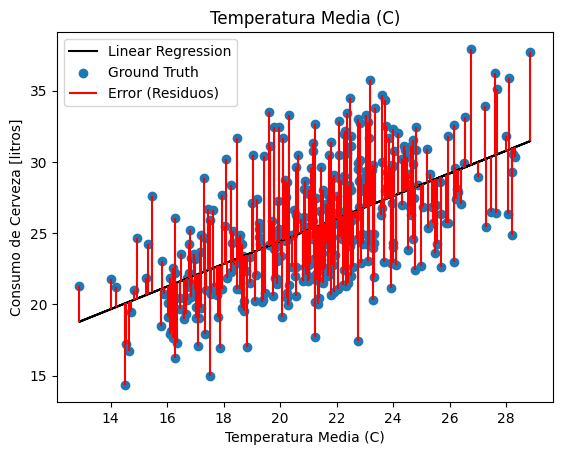


x:         Temperatura Minima (C)
MSE      =  16.33
MAE      =   3.31
MAPE     =  13.41%
R2 Score =   0.15


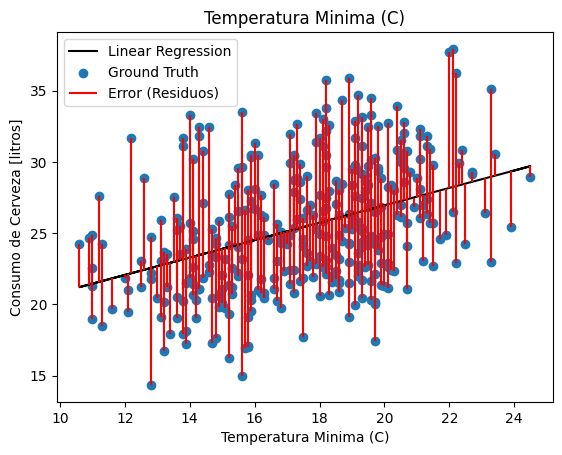


x:         Temperatura Maxima (C)
MSE      =  11.33
MAE      =   2.76
MAPE     =  11.04%
R2 Score =   0.41


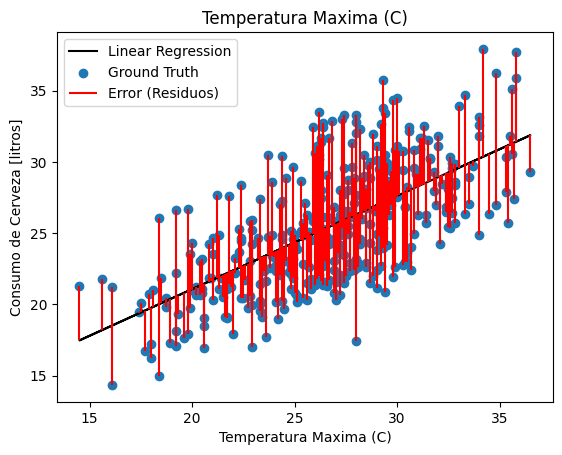


x:         Precipitacao (mm)
MSE      =  18.57
MAE      =   3.55
MAPE     =  14.49%
R2 Score =   0.04


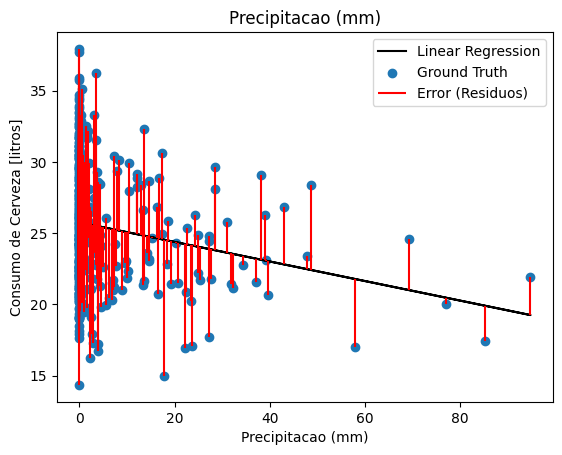


x:         Final de Semana
MSE      =  14.36
MAE      =   3.07
MAPE     =  12.54%
R2 Score =   0.26


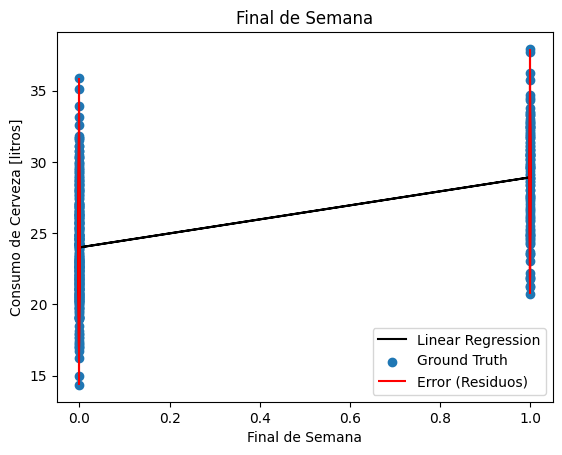

In [ ]:
# Tu código aquí ...
x = cerveza_df.columns.to_list()[1:-1]
y_real = np.array(cerveza_df["Consumo de cerveja (litros)"].to_list())

for variable in x:
  #
  x_test = np.array(cerveza_df[variable].to_list())

  beta_1 = (np.sum(x_test)*np.sum(y_real) - len(x_test)*np.sum(x_test*y_real)) / (np.sum(x_test)**2 - len(x_test)*np.sum(x_test**2))
  beta_0 = (np.sum(y_real) - beta_1*np.sum(x_test)) / len(x_test)

  y_pred = (beta_1 * x_test) + beta_0

  # Calculamos cada una de estas métricas, y podemos ver que los valores
  # son iguales a nuestras implementaciones en Numpy puro.
  mse = mean_squared_error(y_real , y_pred)
  mae = mean_absolute_error(y_real , y_pred)
  mape = mean_absolute_percentage_error(y_real, y_pred)
  r2= r2_score(y_real , y_pred)

  # Impresión de resultados
  print()
  print(f'x:         {variable}')
  print(f'MSE      = {mse:6.2f}')
  print(f'MAE      = {mae:6.2f}')
  print(f'MAPE     = {mape*100:6.2f}%')  # Multiplicamos por 100 para expresarlo como porcentaje
  print(f'R2 Score = {r2:6.2f}')

  fig, ax = plt.subplots(1,1)
  ax.plot(x_test,y_pred, color="black", label="Linear Regression")
  ax.scatter(x_test,y_real, label="Ground Truth")
  ax.vlines(x_test, y_real, y_pred, color="red", label="Error (Residuos)") #Gráficamos los Errores en cada punto.
  ax.xaxis.set_label_text(f'{variable}')
  ax.yaxis.set_label_text('Consumo de Cerveza [litros]')
  ax.set_title(f'{variable}')
  plt.legend()
  plt.show()

<font color='green'>Fin Actividad 2</font>

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="100" align="left" title="Runa-perth">
<br clear="left">


##<font color='red'>**Contenido opcional**</font>

##<font color='blue'>__Reflexión sobre la Importancia de la Normalidad y Homocedasticidad de los Errores en la Regresión Lineal__</font>


En los modelos de regresión lineal, tanto simples como múltiples, es fundamental analizar el comportamiento de los errores (residuos) del modelo. Una suposición clave es que estos errores estén distribuidos de manera normal alrededor de cero. La normalidad de los residuos no afecta directamente la calidad de las predicciones, pero sí es crucial para la validez de las inferencias estadísticas, como la construcción de intervalos de confianza o la realización de pruebas de hipótesis sobre los coeficientes del modelo. Si los errores no son normales, los intervalos y los `p-values` de las pruebas pueden ser inexactos. Además, es importante que los residuos cumplan con la condición de __homocedasticidad__, es decir, que la varianza de los errores sea constante a lo largo de todos los valores de las variables independientes. Cuando esta condición se cumple, decimos que los errores son __homocedásticos__. Si, en cambio, la varianza de los errores cambia (por ejemplo, aumentando o disminuyendo sistemáticamente con el valor de una variable independiente), se produce __heterocedasticidad__, lo cual puede sesgar las estimaciones de las varianzas de los coeficientes, afectando la confiabilidad de las pruebas estadísticas y provocando inferencias incorrectas. Por ello, verificar la normalidad y la homocedasticidad de los residuos es un paso esencial en la evaluación de un modelo de regresión lineal.

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Calcular los residuos
residuos = y - y_pred_final

# -----------------------
# Análisis gráfico básico
# -----------------------

# Crear la figura con tres subplots en una misma fila
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Histograma de residuos
axs[0].hist(residuos, bins=30, density=True, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de los Residuos')
axs[0].set_xlabel('Residuo')
axs[0].set_ylabel('Densidad')
axs[0].grid(True, alpha=0.3)

# QQ-Plot
stats.probplot(residuos, dist="norm", plot=axs[1])
axs[1].set_title('QQ-Plot de los Residuos')
axs[1].grid(True, alpha=0.3)

# Residuos vs Predicciones
axs[2].scatter(y_pred_final, residuos, alpha=0.4, s=10, color='blue', edgecolor='black')
axs[2].axhline(0, color='red', linestyle='--')
axs[2].set_title('Residuos vs Valores Predichos')
axs[2].set_xlabel('Valores Predichos')
axs[2].set_ylabel('Residuos')
axs[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------
# Análisis estadístico
# -----------------------

# Test de normalidad de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro-Wilk Test: Estadístico={shapiro_test.statistic:.4f}, p-valor={shapiro_test.pvalue:.8f}")

# Test de homocedasticidad (Breusch-Pagan)
# Agregar constante a las predicciones
y_pred_const = sm.add_constant(y_pred_final)

# Breusch-Pagan test
bp_test = het_breuschpagan(residuos, y_pred_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print('Breusch-Pagan Test:', dict(zip(labels, bp_test)))

NameError: name 'y_pred_final' is not defined

El test de Shapiro-Wilk muestra un estadístico de 0.9771 con un p-valor de 0.00001520, lo que indica que los residuos no siguen una distribución normal, ya que el p-valor es significativamente menor a 0.05. Por otro lado, el test de Breusch-Pagan arroja un p-valor de aproximadamente 0.0521, apenas por encima del umbral común de 0.05. Esto sugiere que no hay evidencia estadísticamente significativa de heterocedasticidad, aunque el resultado es marginal y podría considerarse como una advertencia de posibles problemas leves en la constancia de la varianza de los errores.

Supongamos que estamos analizando el consumo de cerveza en función de la temperatura media diaria:
- En días fríos (por ejemplo, temperaturas entre 10°C y 18°C), el consumo de cerveza es bajo y muy similar entre los diferentes grupos: la mayoría consume poco y hay poca variabilidad.
- Sin embargo, en días muy calurosos (temperaturas sobre 28°C), el consumo de cerveza varía mucho más: algunos grupos pueden consumir mucho más debido a reuniones sociales o eventos al aire libre, mientras que otros mantienen consumos moderados.

Si construyes un modelo de regresión lineal simple consumo vs temperatura media, notarás que:
- A temperaturas bajas, los residuos son pequeños: el modelo predice bien y el error es bajo.
- A temperaturas altas, los residuos se dispersan: el modelo predice un promedio, pero los errores alrededor de esa predicción son mucho más grandes y variables.

Esto es heterocedasticidad:
la varianza de los errores no es constante, sino que aumenta con la temperatura.

- El modelo puede seguir prediciendo un consumo promedio? → Sí, razonablemente bien.
- ¿Qué se ve afectado? → Cuando hacemos un modelo de regresión, no solo queremos predecir, también queremos entender qué tan fuerte es la relación entre las variables (por ejemplo, cuánto aumenta el consumo de cerveza si sube la temperatura). Para eso, calculamos cosas como:La precisión de los intervalos de confianza y de las inferencias sobre los coeficientes de la regresión; cuando hay heterocedasticidad (es decir, si los errores no tienen una varianza constante), estos cálculos pueden ser inexactos.
- ¿Qué debería considerarse? → Usar errores estándar robustos o transformar la variable de respuesta (por ejemplo, aplicando logaritmo al consumo).

<img src="https://drive.google.com/uc?export=view&id=1Igtn9UXg6NGeRWsqh4hefQUjV0hmzlBv" width="50" align="left" title="Runa-perth">
<br clear="left">

## <font color='blue'>**Regresión lineal con múltiples variables independientes**</font>

En la sección anterior, evaluamos el ajuste de un modelo de regresión lineal simple, utilizando una única variable independiente para explicar el comportamiento de la variable dependiente. Ahora, utilizando el mismo conjunto de datos de la <font color='green'>Actividad 2</font>, extenderemos el análisis ajustando un modelo de regresión lineal múltiple.

La regresión lineal múltiple consiste en modelar la variable dependiente a partir de dos o más variables independientes, en lugar de una sola. En este caso, la ecuación de regresión toma la siguiente forma:
<br><br>
$$
Y = \beta_0 + X_1\beta_1 + X_2\beta_2 + \dots + X_m\beta_m
$$
<br>
Aquí, el modelo tendrá un total de $m+1$ parámetros: $m$ correspondientes a las variables independientes utilizadas, más uno adicional para el intercepto $\beta_0$.

Podemos reescribir esta ecuación de manera más compacta usando notación matricial:
<br><br>
$$
Y = X^T \beta
$$
<br>
donde:

$$Y = \begin{bmatrix}Y_1 \\ Y_2  \\ \vdots \\ Y_m\end{bmatrix} \quad \beta = \begin{bmatrix}\beta_1 \\ \beta_2  \\ \vdots \\ \beta_m\end{bmatrix}  \quad X = \begin{bmatrix}X_{11} & X_{12} & \cdots & X_{1m}\\ X_{21} & X_{22} & \cdots & X_{2m}  \\ \vdots & \vdots & \ddots & \vdots\\ X_{n1} & X_{n2} & \cdots & X_{nm}\end{bmatrix}
$$
<br><br>
El objetivo es encontrar los valores estimados de los parámetros, $\hat{\beta}$, que minimicen la suma de los errores cuadráticos entre las predicciones y los valores observados. La solución analítica para este problema es:

$$
\hat{\beta} = (X^T X)^{-1} X^T Y
$$

Para incluir el término de intercepto $\beta_0$ en este modelo, es necesario modificar la matriz de variables independientes $X$. Específicamente, se debe agregar una columna adicional de unos, lo que permite que el modelo ajuste automáticamente el intercepto. La transformación sería:

$$
X =
\begin{bmatrix}
X_{11} & X_{12} & \cdots & X_{1m} \\
X_{21} & X_{22} & \cdots & X_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
X_{n1} & X_{n2} & \cdots & X_{nm}
\end{bmatrix}
\quad \longrightarrow \quad
X’ =
\begin{bmatrix}
1 & X_{11} & X_{12} & \cdots & X_{1m} \\
1 & X_{21} & X_{22} & \cdots & X_{2m} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & X_{n1} & X_{n2} & \cdots & X_{nm}
\end{bmatrix}
$$

De esta forma, la matriz $X’$ contiene explícitamente el término constante necesario para calcular $\hat{\beta_0}$ junto con el resto de los coeficientes del modelo.

In [ ]:
cerveza_df.head(10) # Mostramos los primeros 5

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28.900
5,2015-01-06,23.78,20.1,30.5,12.2,0,28.218
6,2015-01-07,24.00,19.5,33.7,0.0,0,29.732
7,2015-01-08,24.90,19.5,32.8,48.6,0,28.397
8,2015-01-09,28.20,21.9,34.0,4.4,0,24.886
9,2015-01-10,26.76,22.1,34.2,0.0,1,37.937


In [ ]:
#Extraemos nuestras primeras 5 variables independientes
X1 = cerveza_df['Temperatura Media (C)']
X2 = cerveza_df['Temperatura Minima (C)']
X3 = cerveza_df['Temperatura Maxima (C)']
X4 = cerveza_df['Precipitacao (mm)']
X5 = cerveza_df['Final de Semana']

# Extraemos la variable dependiente
y = cerveza_df['Consumo de cerveja (litros)']


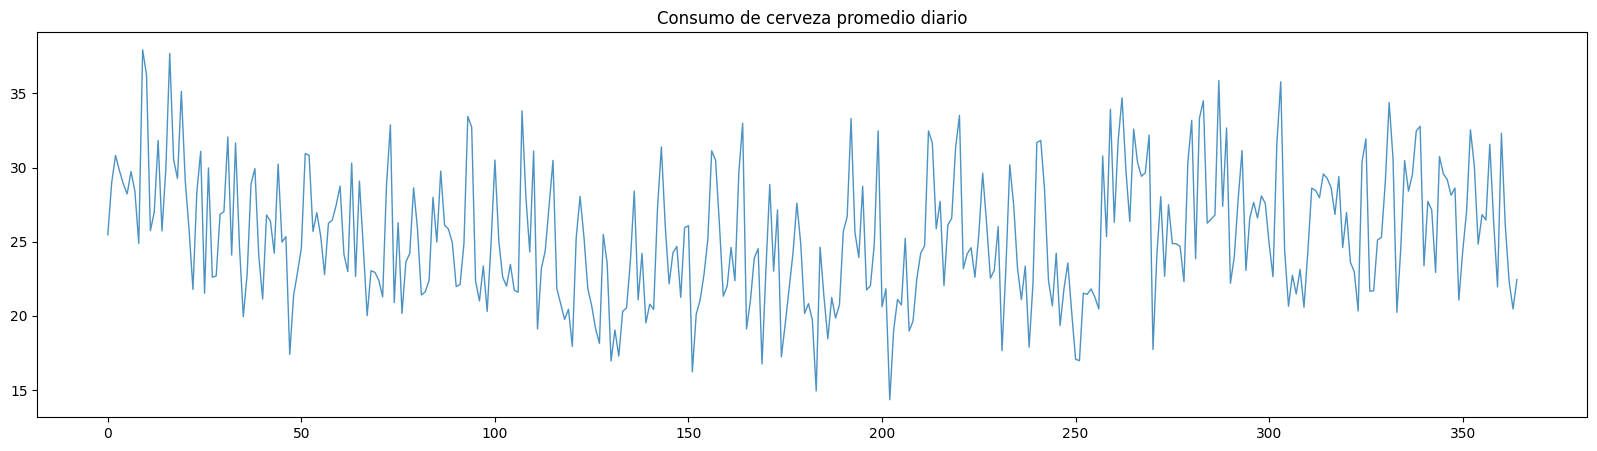

In [ ]:
# Vamos a graficar nuestra variable y a traves del tiempo:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)),y, linewidth=1, alpha=0.8)
plt.title("Consumo de cerveza promedio diario")
plt.show()

Acá generaremos una grilla de matplotlib, la cual  nos permitirá generar subgráficos que ocupen más de una fila/columna.

[Documentación Gridspec](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.gridspec.GridSpec.html)

En este caso, vamos a hacer varios diagramas de dispersión, para ver la relación existente entre nuestras variables independientes, con la variable dependiente.


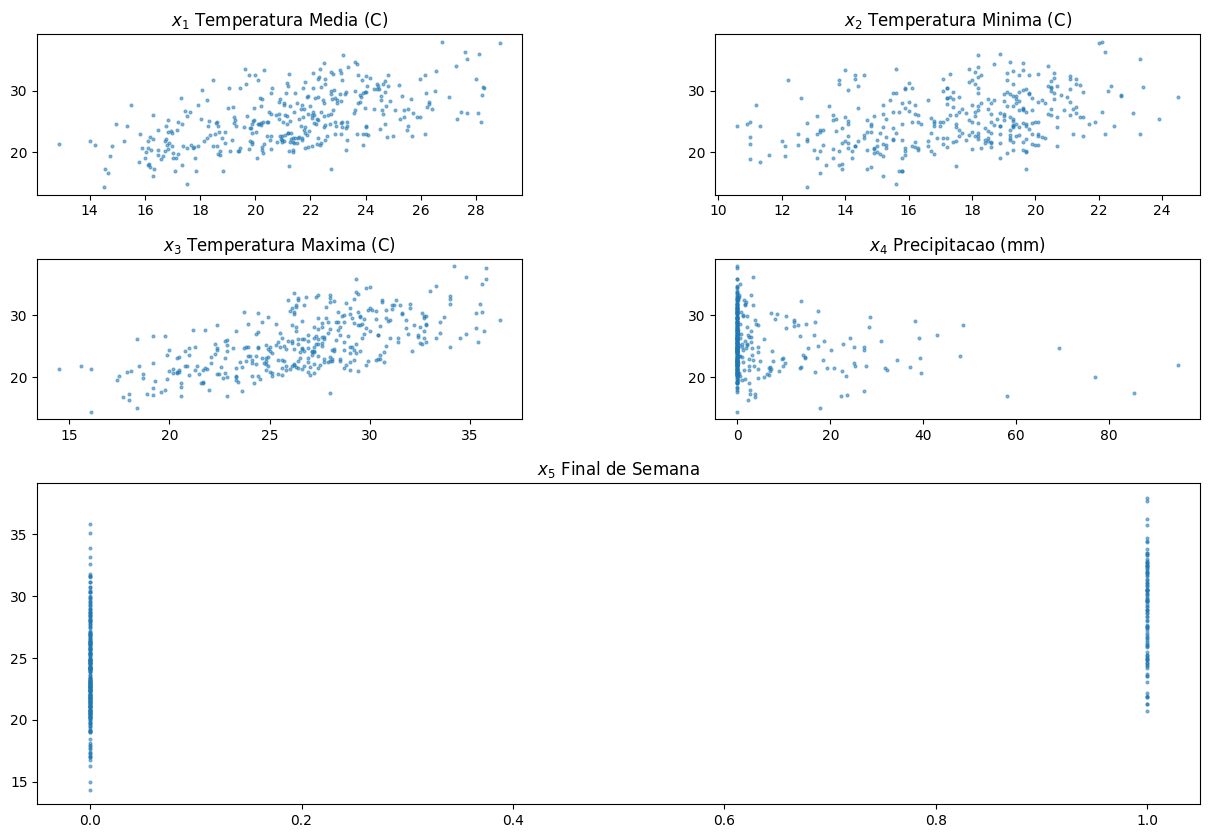

In [ ]:
grid = plt.GridSpec(3, 2, wspace=0.4, hspace=0.3, height_ratios=[1, 1, 2])

plt.figure(figsize=(15,10))
ax = plt.subplot(grid[0,0]) #Ocupar la primera fila, primera columna
ax.scatter(X1, y, s=4, alpha=0.5)
ax.set_title("$x_1$ Temperatura Media (C)")

ax = plt.subplot(grid[0,1])#Ocupar la primera fila, segunda columna
ax.scatter(X2, y, s=4, alpha=0.5)
ax.set_title("$x_2$ Temperatura Minima (C)")

ax = plt.subplot(grid[1,0]) #Ocupar la segunda fila, primera columna
ax.scatter(X3, y, s=4, alpha=0.5)
ax.set_title("$x_3$ Temperatura Maxima (C)")

ax = plt.subplot(grid[1,1])#Ocupar la segunda fila, segunda columna
ax.scatter(X4, y, s=4, alpha=0.5)
ax.set_title("$x_4$ Precipitacao (mm)")

ax = plt.subplot(grid[2,:])#Ocupar la tercera fila y ambas columnas
ax.scatter(X5, y, s=4, alpha=0.5)
ax.set_title("$x_5$ Final de Semana")


plt.show()

Podemos ver que el consumo de cerveza al parecer tiene una correlación positiva con las temperaturas. Generemos nuestra matriz X previo al proceso de obtención de los betas:

In [ ]:
X = np.zeros((len(X1),6)) #Generamos una matriz de Nx6, uno para cada una de nuestros variables independientes, e incluyendo la columna para el intercepto:
X.shape

(365, 6)

In [ ]:
# Llenamos la matriz, con cada una de los valores correspondientes, en este caso, el intercepto ira en la primera columna
# y para el resto de las columnas las extraeremos utilizando los valores de una serie de pandas (.value)
X[:,0] = 1
X[:,1] = X1.values
X[:,2] = X2.values
X[:,3] = X3.values
X[:,4] = X4.values
X[:,5] = X5.values


In [ ]:
X[:5] # Ahora imprimimos las primeras 5 filas

array([[ 1.  , 27.3 , 23.9 , 32.5 ,  0.  ,  0.  ],
       [ 1.  , 27.02, 24.5 , 33.5 ,  0.  ,  0.  ],
       [ 1.  , 24.82, 22.4 , 29.9 ,  0.  ,  1.  ],
       [ 1.  , 23.98, 21.5 , 28.6 ,  1.2 ,  1.  ],
       [ 1.  , 23.82, 21.  , 28.3 ,  0.  ,  0.  ]])

Para transponer una matriz de Numpy, es tan sencillo como llamar a `matriz.T` para realizar esta operación. En el caso de la multiplicación matricial, necesitamos utilizar el método `np.dot` (Recordar que existen la restricción de que el número de columnas de la primera matriz, tiene que ser igual al número de filas de la segunda matriz). Finalmente, para invertir una matriz, tenemos que utilizar el método `np.lingal.inv` y aplicarlo en una matriz.
<br><br>
$$ \hat{\beta} = (X^TX)^{-1}X^TY $$

In [ ]:
XTX = np.dot(X.T,X) # Calculamos X traspuesto multiplicado por X
XTY = np.dot(X.T,y) # Calculamos X traspuesto por Y
betas = np.dot(np.linalg.inv(XTX),XTY) #Calculamos XTX^-1 por XTY, el resultado va a ser nuestro vector de betas de largo m + 1

# Extraemos los betas
beta_0 = betas[0]
beta_1 = betas[1]
beta_2 = betas[2]
beta_3 = betas[3]
beta_4 = betas[4]
beta_5 = betas[5]

betas # Imprimimos los valores de nuestros parámetros ajustados

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

In [ ]:
# Finalmente, definimos nuestra función  para la regresión lineal, que reciba por parametros los arreglos para cada variable
# y que internamente, calcule la variable Y con los nuevos betas

def lin_reg2(x1, x2, x3, x4, x5):
    y_hat = (beta_1 * x1) + (beta_2 * x2) + (beta_3 * x3) + (beta_4 * x4) + (beta_5 * x5) + beta_0
    return y_hat

Graficamos la señal original, en comparación con lo que obtenemos de nuestra regresión lineal múltiple

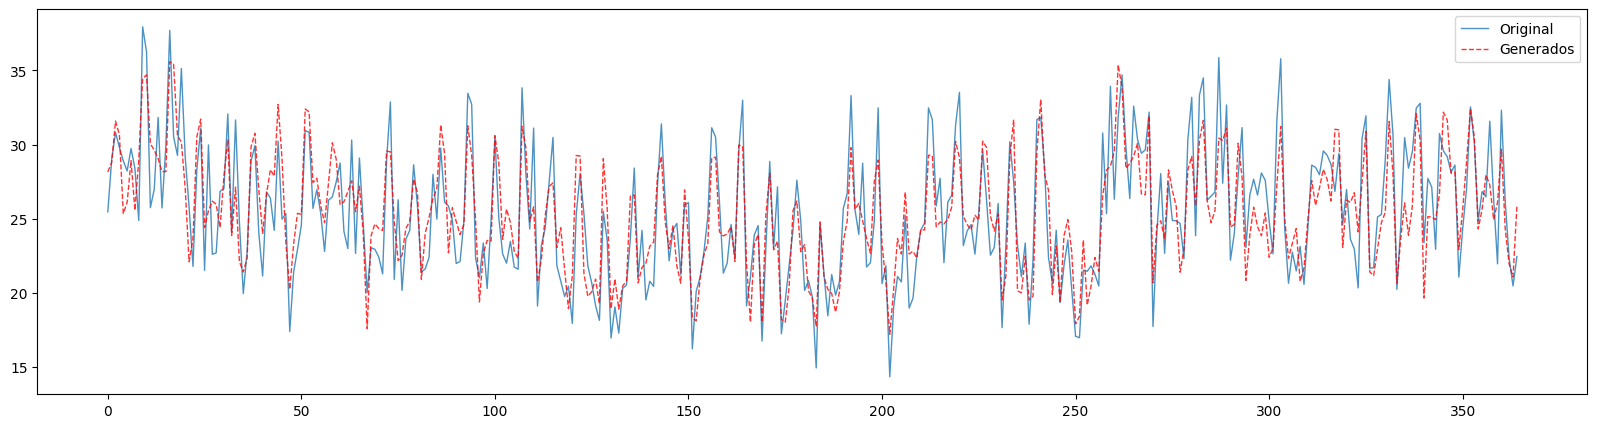

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(np.arange(len(y)), y, linewidth=1, alpha=0.8, label="Original")
plt.plot(np.arange(len(y)), lin_reg2(X1, X2, X3, X4, X5),
         linewidth=1, alpha=0.8, linestyle='--', color="red", label="Generados")

plt.legend()

plt.show()

Y a su vez, podemos calcular nuestras métricas de bondad de ajuste, y errores asociados:

In [ ]:
SST = np.sum((y - np.mean(y))**2)
SSE = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2)

R2 = 1 - (SSE/SST)

print(f'\nR2 Score = {R2:6.2f}')


R2 Score =   0.72


In [ ]:
mse = np.sum((y - lin_reg2(X1,X2,X3,X4,X5))**2) / len(y)
mae = np.sum(np.abs(y - lin_reg2(X1,X2,X3,X4,X5))) / len(y)
mape = np.sum(np.abs((y - lin_reg2(X1,X2,X3,X4,X5))/y)) / len(y)

In [ ]:
print(f'\nMSE = {mse:6.2f}\nMAE = {mae:6.2f}\nMAPE = {mape:5.2f}')


MSE =   5.35
MAE =   1.96
MAPE =  0.08


de lo obtenido, podemos ver que utilizando una regresión lineal múltiple, nuestro $R^2$ aumenta, y los errores disminuyen al compararse con el mejor de las regresiones simples realizadas en la <font color='green'>Actividad 2</font>.

## <font color='blue'>**Regresión lineal con _scikit-learn_**</font>
Para ir finalizando, existen múltiples librerías que ya tienen implementado las regresiones lineales, vamos a ver la implementación existente en `scikit-learn`

[Documentación LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)


In [ ]:
# En este caso, de scikit-learn, de los modelos lineales, importamos la regresión lineal
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # Y generamos un obtejo de LinearRegressión

In [ ]:
# Obtenemos nuestra matriz X
# Eliminamos las columnas 0 y 6 (fecha y consumo)
X = cerveza_df.iloc[:,1:6]
X.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana
0,27.30,23.9,32.5,0.0,0
1,27.02,24.5,33.5,0.0,0
2,24.82,22.4,29.9,0.0,1
3,23.98,21.5,28.6,1.2,1
4,23.82,21.0,28.3,0.0,0


Una de las ventajas de scikit-learn, es que para la regresión lineal automáticamente añade el intercepto a calcular, sin que nosotros tengamos que modificar nuestra matriz $X$. Para poder ajustar nuestro modelo, necesitamos utilizar el método `lr.fit(X,y)`:

In [ ]:
lr.fit(X, y.values)

LinearRegression()

Con esto, ya tenemos ajustado el modelo de regresión lineal, y solo queda extraer los betas. Para esto, tenemos que acceder a los parámetros `lr.intercept` (para $\hat{\beta_0}$) y `lr.coef_` para el resto de los betas.

In [ ]:
lr.intercept_, lr.coef_

(np.float64(6.444696360572017),
 array([ 0.03079559, -0.01903491,  0.65600076, -0.05746938,  5.18318073]))

Haciendo la comparación con nuestros betas, vemos que son iguales.

In [ ]:
betas

array([ 6.44469636,  0.03079559, -0.01903491,  0.65600076, -0.05746938,
        5.18318073])

## <font color='green'>**Actividad 3**</font>
### Regresión lineal múltiple, para predecir el precio de una casa.

En este caso, trabajaremos con un set de datos de precios de casas del condado de King, Georgia, USA. El set de datos contiene 21 variables, pero no todas van a servir para el proceso de la regresión. Su tarea va a ser seleccionar las variables que va a descartar, y trabajar con el resto de las variables restantes para generar una regresión lineal múltiple utilizando Numpy para obtener los $\hat{\beta}$. Además de esto, calcule el $R^2$ y obtenga las métricas de error $MSE$, $MAE$ y $MAPE$.

**Desafío:** Puede que el uso de todas las variables no genere el mejor modelo. Por lo mismo, el **desafío** consiste en implementar el algoritmo de __Step Forward Feature Selection__. La idea de este algoritmo es agregar de a 1 en 1 las variables existentes en nuestro set de datos y ver como mejora el proceso de ajuste de la regresión lineal.

1. De las posibles variables consideradas en un principio (la cual llamaremos $m$), entrene $m$ modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor $MAE$.

2. Con la variable seleccionada, remuévala del conjunto de posibles variables y guárdela en una lista de variables seleccionadas (`selected_vars`)

3. Del conjunto de posibles variables restantes, entrene $m-len(selected\_vars)$ modelos de regresión lineal utilizando las variables restantes en conjunto con `selected_vars`. Seleccione la nueva variable que obtenga un mejor $MAE$. Repita el paso 2. hasta que no quede ninguna variable.

4. Finalmente, con el procedimiento realizado, y ninguna variable restante en el conjunto de posible variable, imprima por pantalla el mejor conjunto de variables junto con su $MAE$. Adicionalmente, puede graficar la curva de cómo va evolucionando el $MAE$ a medida que va agregando variables.

**Nota:** Para el desafío, es recomendable utilizar `LinearRegression` de `scikit-learn` por temas de facilidad de implementación del algoritmo de __Step Forward Feature Selection__. Para poder obtener el $\hat{Y}$ utilizando `LinearRegression`, se debe utilizar el método `.predict(X)` posteriormente a haber ajustado el modelo (`.fit(X,y)`), y este computara:
<br><br>
$$\hat{Y}=\hat{\beta_0}+X_1\hat{\beta_1}+X_2\hat{\beta_2}+\dots+X_m\hat{\beta_m}$$
<br>
Ejemplo de uso:

```python
lr = LinearRegression()
lr.fit(X,y)
y_hat = lr.predict(X)
```

In [21]:
# Drive
housing_df = pd.read_csv("/content/drive/MyDrive/MODULO 8 - INTRODUCCION ML/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [22]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [32]:
# predicción
# construimos la matriz de diseño X con un término constante
features = [c for c in housing_df.columns if c not in discard_cols + [target]]
X = housing_df[features].values
y = housing_df[target].values

# añadimos columna de 1s para el intercepto
X_design = np.hstack((np.ones((X.shape[0], 1)), X))


# cálculo de β̂
XtX = X_design.T @ X_design
XtX_inv = np.linalg.inv(XtX)
XtY = X_design.T @ y
beta_hat = XtX_inv @ XtY


y_pred = X_design @ beta_hat

# métricas
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse  = mean_squared_error(y, y_pred)
mae  = mean_absolute_error(y, y_pred)
mape = np.mean(np.abs((y - y_pred) / y)) * 100
r2   = 1 - (np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2))

print(f"R2   = {r2:.4f}")
print(f"MSE  = {mse:.2f}")
print(f"MAE  = {mae:.2f}")
print(f"MAPE = {mape:.2f}%")

R2   = -85.7326
MSE  = 11689482713262.75
MAE  = 2736470.44
MAPE = 712.27%


**Desafío: Step-Forward Feature Selection**


In [23]:
# Tu código aquí ...

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

discard_cols = ['id','date']
target = 'price'

# PARTE 1: De las posibles variables consideradas en un principio (la cual llamaremos  m ),
# entrene  m  modelos de regresión lineal (uno por cada variable), y seleccione la variable que obtenga un mejor  MAE .

# Definimos correctamente las features
features = [col for col in housing_df.columns
            if col not in discard_cols + [target]]

print("Features usadas:", features)


y = housing_df[target].values

best_mae = float('inf')
best_var = None

for var in features:
    # Modelo con una sola variable
    X_var = housing_df[[var]].values
    lr = LinearRegression()
    lr.fit(X_var, y)
    y_pred = lr.predict(X_var)

    mae = mean_absolute_error(y, y_pred)
    print(f"Variable: {var:15} → MAE = {mae:.2f}")

    # Guardamos la mejor
    if mae < best_mae:
        best_mae = mae
        best_var = var

print(f"\nMejor variable inicial: '{best_var}' con MAE = {best_mae:.2f}")

Features usadas: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Variable: bedrooms        → MAE = 220663.01
Variable: bathrooms       → MAE = 203653.36
Variable: sqft_living     → MAE = 173688.27
Variable: sqft_lot        → MAE = 232645.58
Variable: floors          → MAE = 223961.68
Variable: waterfront      → MAE = 229555.66
Variable: view            → MAE = 218587.75
Variable: condition       → MAE = 233554.61
Variable: grade           → MAE = 175179.03
Variable: sqft_above      → MAE = 191857.49
Variable: sqft_basement   → MAE = 224476.48
Variable: yr_built        → MAE = 234021.45
Variable: yr_renovated    → MAE = 232163.03
Variable: zipcode         → MAE = 233746.23
Variable: lat             → MAE = 212217.33
Variable: long            → MAE = 233635.34
Variable: sqft_living15   → MAE = 186637.07
Variable: sq

In [25]:
# PARTE 2
# Con la variable seleccionada, remuévala del conjunto de posibles variables y guárdela en una lista de variables seleccionadas (selected_vars)
# 1. Inicializas tu lista de variables seleccionadas

selected_vars = ['sqft_living']

# 2. Remuevo esa variable de la lista de candidatas
remaining_vars = [var for var in features if var != best_var]

In [27]:
# PARTE 3
# Del conjunto de posibles variables restantes, entrene  m−len(selected_vars)  modelos de regresión lineal utilizando las variables restantes en conjunto con selected_vars.
# Seleccione la nueva variable que obtenga un mejor  MAE . Repita el paso 2. hasta que no quede ninguna variable.

results = []  # Para ir guardando (lista_de_vars, MAE)

while remaining_vars:
    best_mae = float('inf')
    best_var = None

    # Pruebo cada candidato junto con las seleccionadas
    for var in remaining_vars:
        current_vars = selected_vars + [var]
        X_cur = housing_df[current_vars].values

        lr = LinearRegression()
        lr.fit(X_cur, y)
        y_pred = lr.predict(X_cur)

        mae = mean_absolute_error(y, y_pred)
        print(f"Probando {var:15} con vars={current_vars} → MAE = {mae:.2f}")

        if mae < best_mae:
            best_mae = mae
            best_var = var

    # Actualizo las listas con la mejor variable de este paso
    selected_vars.append(best_var)
    remaining_vars.remove(best_var)
    results.append((selected_vars.copy(), best_mae))

    print(f"→ Agregada '{best_var}' | MAE actual = {best_mae:.2f}\n")

# Al terminar, results contiene cada paso:
# [( ['sqft_living'], mae1 ), ( ['sqft_living','bathrooms'], mae2 ), ... ]

# El subconjunto que logró el MAE más bajo en todo el proceso:
best_subset, best_subset_mae = min(results, key=lambda x: x[1])
print(f"Mejor subconjunto: {best_subset} con MAE = {best_subset_mae:.2f}")

Probando bedrooms        con vars=['sqft_living', 'bedrooms'] → MAE = 170292.40
Probando bathrooms       con vars=['sqft_living', 'bathrooms'] → MAE = 173697.02
Probando sqft_lot        con vars=['sqft_living', 'sqft_lot'] → MAE = 173580.31
Probando floors          con vars=['sqft_living', 'floors'] → MAE = 173520.86
Probando waterfront      con vars=['sqft_living', 'waterfront'] → MAE = 169941.70
Probando view            con vars=['sqft_living', 'view'] → MAE = 167082.90
Probando condition       con vars=['sqft_living', 'condition'] → MAE = 172836.17
Probando grade           con vars=['sqft_living', 'grade'] → MAE = 164569.38
Probando sqft_above      con vars=['sqft_living', 'sqft_above'] → MAE = 173451.47
Probando sqft_basement   con vars=['sqft_living', 'sqft_basement'] → MAE = 173451.47
Probando yr_built        con vars=['sqft_living', 'yr_built'] → MAE = 167430.13
Probando yr_renovated    con vars=['sqft_living', 'yr_renovated'] → MAE = 172591.32
Probando zipcode         con vars=

**Visualizar la evolución del MAE**

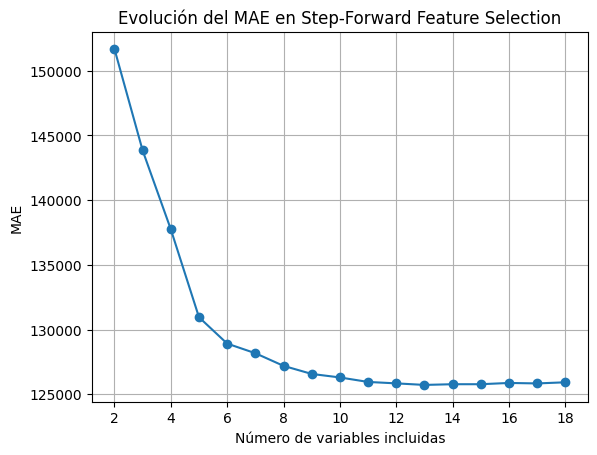

In [33]:
# 1. Extraemos número de variables y el MAE asociado
n_vars = [len(step[0]) for step in results]
maes   = [step[1]      for step in results]

# 2. Graficamos
plt.plot(n_vars, maes, marker='o')
plt.xlabel("Número de variables incluidas")
plt.ylabel("MAE")
plt.title("Evolución del MAE en Step-Forward Feature Selection")
plt.grid(True)
plt.show()

<font color='green'>Fn actividad 3</font>

# <font color='red'>__LINK DE INTERÉS__: Artículo "Regresión Lineal con Python y scikit-learn" un caso aplicado.</font>



El siguiente [artículo](https://deepnote.com/app/mazzaroli/Regresion-Lineal-con-Python-y-scikit-learn-86f7bb72-770c-4e28-9e84-0355aed93892) enseña a construir modelos para predecir resultados futuros, también detalla los conocimientos previos necesarios, como matemáticas básicas para IA, análisis exploratorio de datos y visualización con Matplotlib y Seaborn. Además, incluye un ejemplo aplicado usando el conocido conjunto de datos "Housing" del repositorio UCI, ideal para comprender cómo funciona la regresión lineal en un caso real

# <font color='red'>__LINK DE INTERÉS__: Libro "An Introduction to Statistical Learning, with Applications in Python"</font>



El siguiente [link](https://www.statlearning.com/) conduce a la página del libro "An Introduction to Statistical Learning", cuya versión original incluía ejercicios de Laboratorio de Datos modelados en R, pero el año 2023 publicaron la versión con el uso de Python.
De este modo, todos los capítulos incluyen una sesión Lab, con código y ejercicios analizados que refuerzan los contenidos. El libro aborda tanto Aprendizaje Supervisado como No Supervisado, y se puede descargar desde la web y/o adquirir en librerías.

# **<font color='red'>EXPERIMENTO 1: Conjunto de datos del mundo real para demostrar cómo funciona la regresión lineal tanto con el enfoque manual como con scikit-learn.</font>**


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Funciones para regresión lineal manual
def calcular_coeficientes_manual(X, y):
    """Implementación manual de regresión lineal usando las fórmulas"""
    # Para múltiples variables, calculamos matriz (X^T X)^-1 X^T y
    X_with_ones = np.column_stack((np.ones(X.shape[0]), X))  # Añadir columna de unos para el intercepto
    XTX = np.dot(X_with_ones.T, X_with_ones)
    XTX_inv = np.linalg.inv(XTX)
    XTy = np.dot(X_with_ones.T, y)
    beta = np.dot(XTX_inv, XTy)
    return beta

def predecir_manual(X, beta):
    """Usar coeficientes para predecir valores"""
    X_with_ones = np.column_stack((np.ones(X.shape[0]), X))
    return np.dot(X_with_ones, beta)


In [35]:
# 1. Cargar datos reales de California Housing
print("Cargando datos de viviendas de California...")
housing = fetch_california_housing()
X = housing.data[:, [0]]  # Usamos solo la primera característica (MedInc - ingreso medio)
y = housing.target        # Precio medio de la vivienda

# 2. Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Datos cargados. Total de ejemplos: {X.shape[0]}")
print(f"Conjunto de entrenamiento: {X_train.shape[0]} ejemplos")
print(f"Conjunto de prueba: {X_test.shape[0]} ejemplos")

# 3. Implementación manual de regresión lineal
print("\n--- Implementación Manual de Regresión Lineal ---")
beta_manual = calcular_coeficientes_manual(X_train, y_train)
print(f"Coeficientes obtenidos manualmente: Intercepto = {beta_manual[0]:.4f}, Pendiente = {beta_manual[1]:.4f}")

# Predecir con el modelo manual
y_pred_manual = predecir_manual(X_test, beta_manual)

# Calcular métricas de rendimiento
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)
print(f"MSE (Error Cuadrático Medio): {mse_manual:.4f}")
print(f"R² (Coeficiente de determinación): {r2_manual:.4f}")

# 4. Implementación con scikit-learn
print("\n--- Implementación con scikit-learn ---")
modelo_sklearn = LinearRegression()
modelo_sklearn.fit(X_train, y_train)
print(f"Coeficientes scikit-learn: Intercepto = {modelo_sklearn.intercept_:.4f}, Pendiente = {modelo_sklearn.coef_[0]:.4f}")

# Predecir con el modelo de scikit-learn
y_pred_sklearn = modelo_sklearn.predict(X_test)

# Calcular métricas de rendimiento
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sklearn)
print(f"MSE (Error Cuadrático Medio): {mse_sklearn:.4f}")
print(f"R² (Coeficiente de determinación): {r2_sklearn:.4f}")


Cargando datos de viviendas de California...
Datos cargados. Total de ejemplos: 20640
Conjunto de entrenamiento: 16512 ejemplos
Conjunto de prueba: 4128 ejemplos

--- Implementación Manual de Regresión Lineal ---
Coeficientes obtenidos manualmente: Intercepto = 0.4446, Pendiente = 0.4193
MSE (Error Cuadrático Medio): 0.7091
R² (Coeficiente de determinación): 0.4589

--- Implementación con scikit-learn ---
Coeficientes scikit-learn: Intercepto = 0.4446, Pendiente = 0.4193
MSE (Error Cuadrático Medio): 0.7091
R² (Coeficiente de determinación): 0.4589


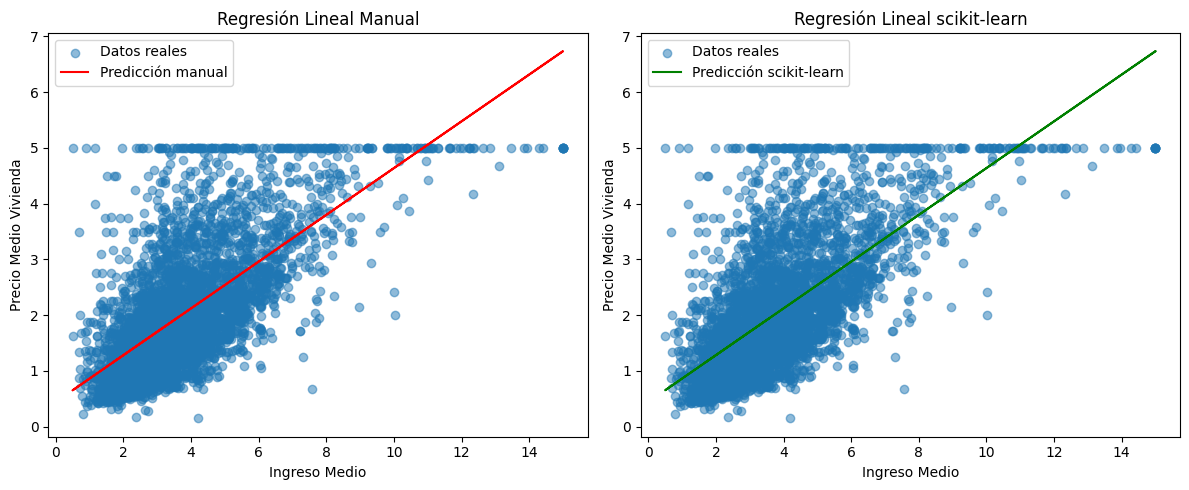

In [49]:
# Gráfico para modelo manual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred_manual, 'r-', label='Predicción manual')
plt.xlabel('Ingreso Medio')
plt.ylabel('Precio Medio Vivienda')
plt.title('Regresión Lineal Manual')
plt.legend()

# Gráfico para modelo scikit-learn
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, alpha=0.5, label='Datos reales')
plt.plot(X_test, y_pred_sklearn, 'g-', label='Predicción scikit-learn')
plt.xlabel('Ingreso Medio')
plt.ylabel('Precio Medio Vivienda')
plt.title('Regresión Lineal scikit-learn')
plt.legend()

plt.tight_layout()

In [50]:
# 6. Comparar los errores de ambos métodos
print("\n--- Comparación de errores ---")
print(f"Diferencia absoluta entre coeficientes:")
print(f"  Intercepto: {abs(beta_manual[0] - modelo_sklearn.intercept_):.10f}")
print(f"  Pendiente: {abs(beta_manual[1] - modelo_sklearn.coef_[0]):.10f}")
print(f"Diferencia en MSE: {abs(mse_manual - mse_sklearn):.10f}")
print(f"Diferencia en R²: {abs(r2_manual - r2_sklearn):.10f}")


--- Comparación de errores ---
Diferencia absoluta entre coeficientes:
  Intercepto: 0.0000000000
  Pendiente: 0.0000000000
Diferencia en MSE: 0.0000000000
Diferencia en R²: 0.0000000000


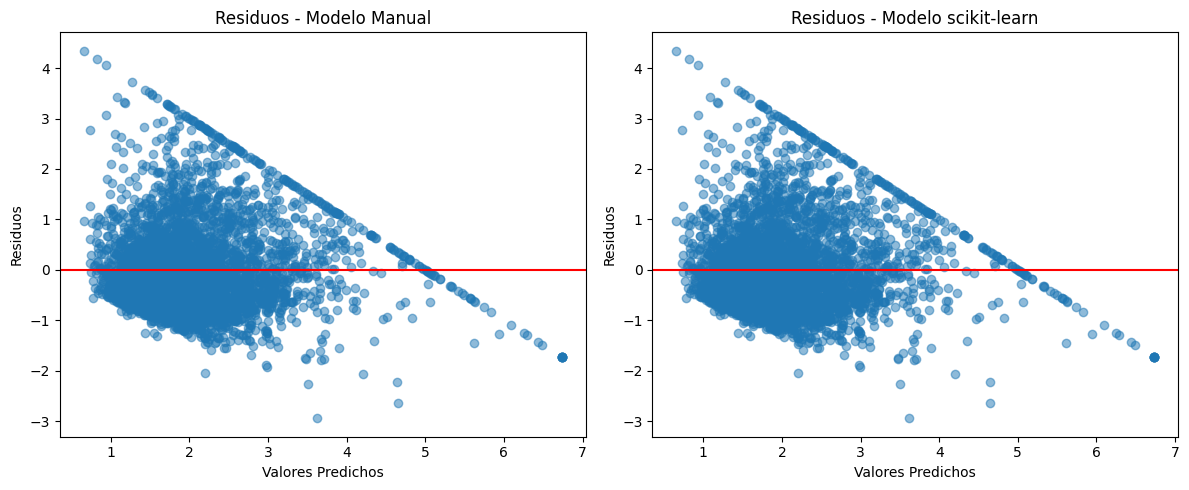

In [51]:
# 7. Visualizar los residuos
plt.figure(figsize=(12, 5))

# Residuos del modelo manual
plt.subplot(1, 2, 1)
residuos_manual = y_test - y_pred_manual
plt.scatter(y_pred_manual, residuos_manual, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos - Modelo Manual')

# Residuos del modelo scikit-learn
plt.subplot(1, 2, 2)
residuos_sklearn = y_test - y_pred_sklearn
plt.scatter(y_pred_sklearn, residuos_sklearn, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Residuos - Modelo scikit-learn')

plt.tight_layout()



--- Regresión Lineal Múltiple ---
Usando todas las características (8):
MSE: 0.5559
R²: 0.5758
Mejora en R² comparado con modelo univariable: 0.1169


Text(0.5, 1.0, 'Predicciones vs Valores Reales (Regresión Múltiple)')

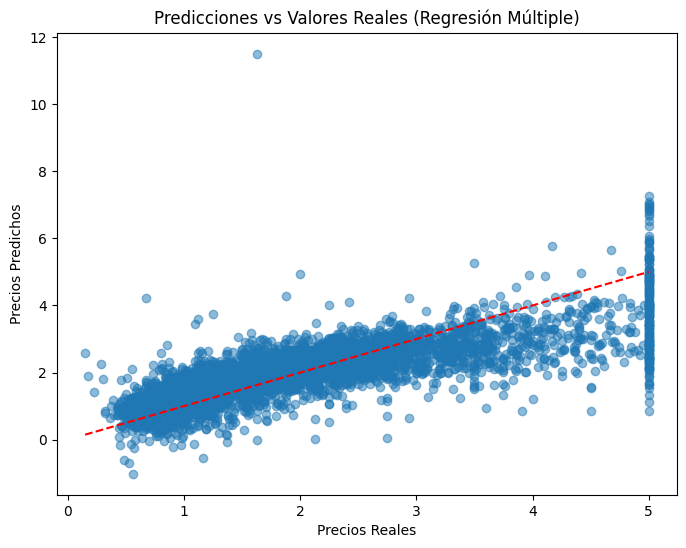

In [53]:
# 8. Regresión multivariable usando todas las características
print("\n--- Regresión Lineal Múltiple ---")

# Usar todas las características
X_full = housing.data
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y, test_size=0.2, random_state=42)

# Modelo scikit-learn con todas las características
modelo_multi = LinearRegression()
modelo_multi.fit(X_train_full, y_train_full)
y_pred_multi = modelo_multi.predict(X_test_full)

# Métricas
mse_multi = mean_squared_error(y_test_full, y_pred_multi)
r2_multi = r2_score(y_test_full, y_pred_multi)

print(f"Usando todas las características ({X_full.shape[1]}):")
print(f"MSE: {mse_multi:.4f}")
print(f"R²: {r2_multi:.4f}")
print(f"Mejora en R² comparado con modelo univariable: {r2_multi - r2_sklearn:.4f}")

# Graficar predicciones vs valores reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test_full, y_pred_multi, alpha=0.5)
plt.plot([y_test_full.min(), y_test_full.max()], [y_test_full.min(), y_test_full.max()], 'r--')
plt.xlabel('Precios Reales')
plt.ylabel('Precios Predichos')
plt.title('Predicciones vs Valores Reales (Regresión Múltiple)')

<font color='red'>FIN DEL EXPERIMENTO